# Predicting Employee Attrition

Installing and Importing Libaries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

Importing file (csv)

In [7]:
# Import the treated data
df = pd.read_csv('../dados/df.csv')

In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


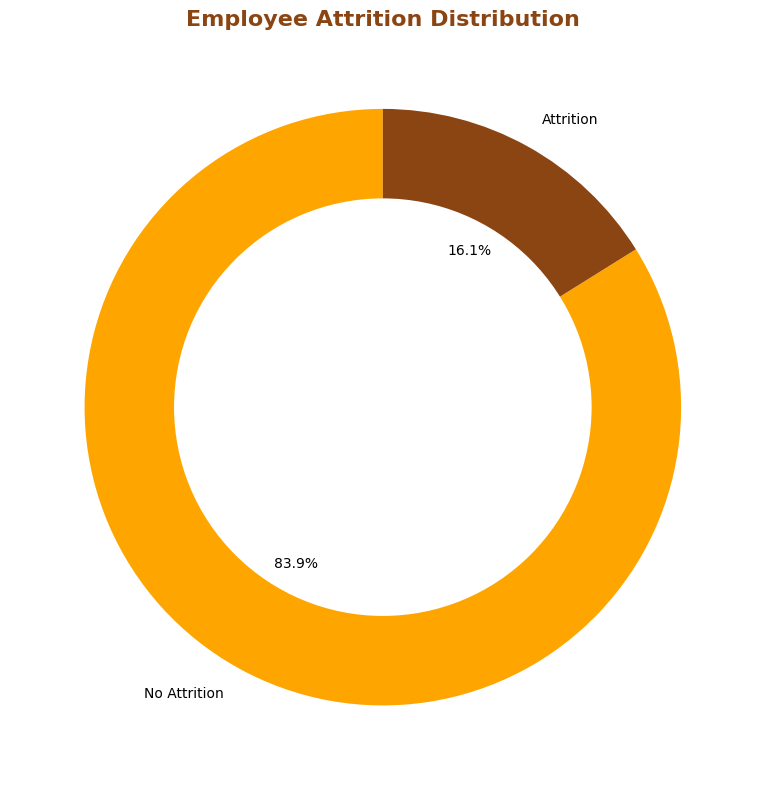

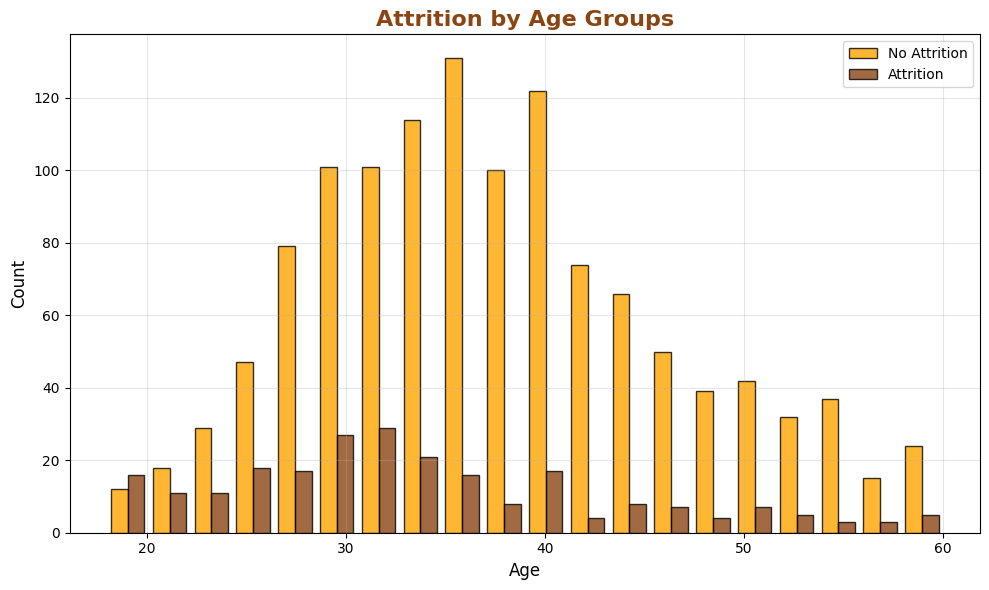

<Figure size 1000x600 with 0 Axes>

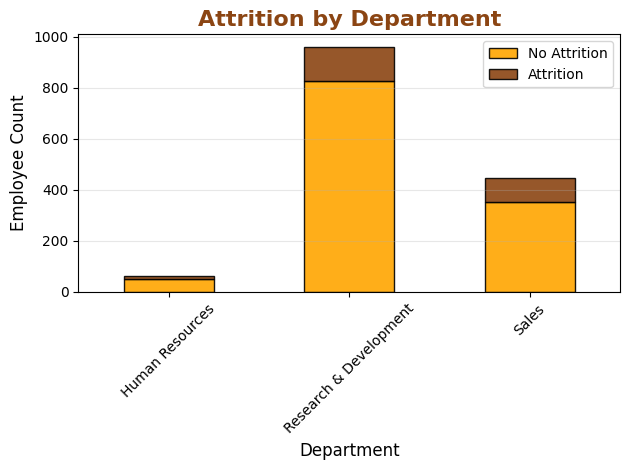

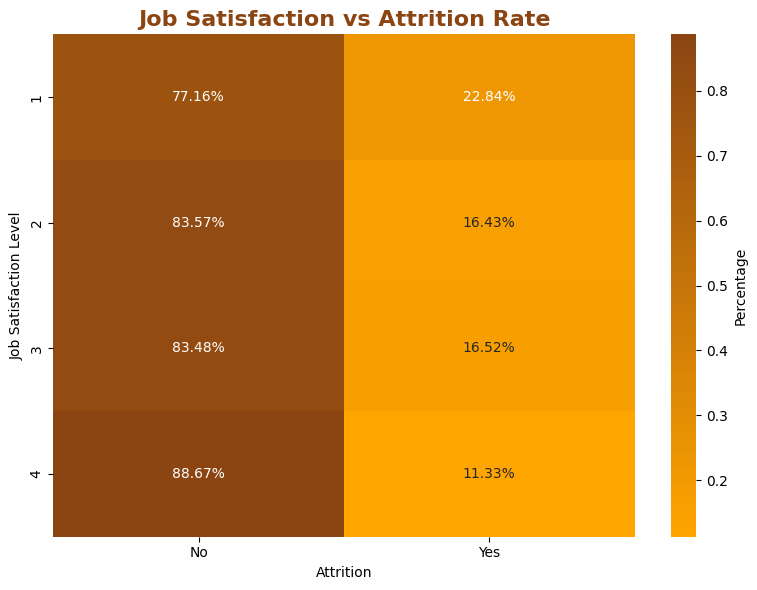

C:\Users\carla\AppData\Local\Temp\ipykernel_3704\4235563411.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df,


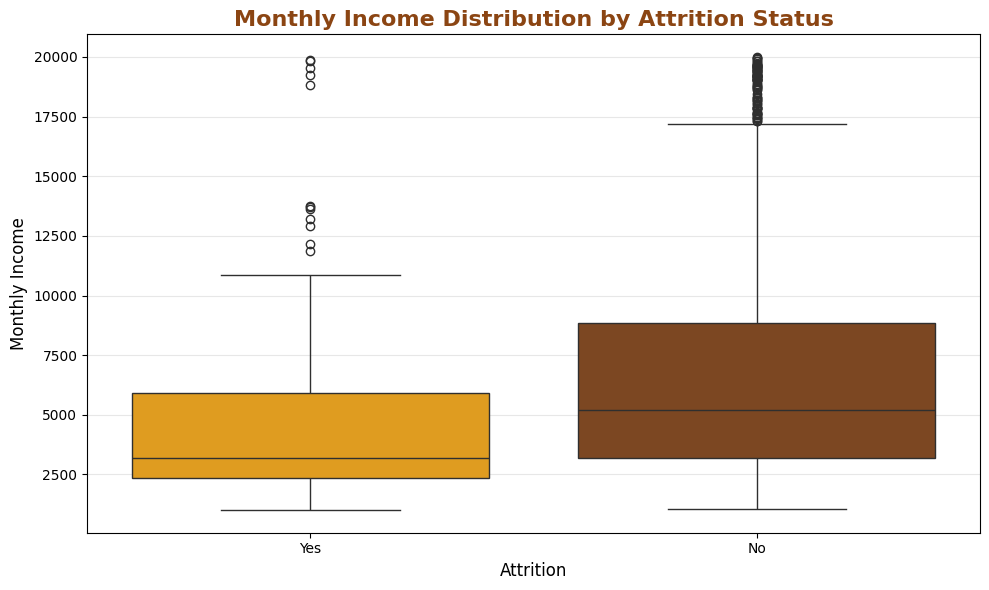

C:\Users\carla\AppData\Local\Temp\ipykernel_3704\4235563411.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='YearsAtCompany', data=df,


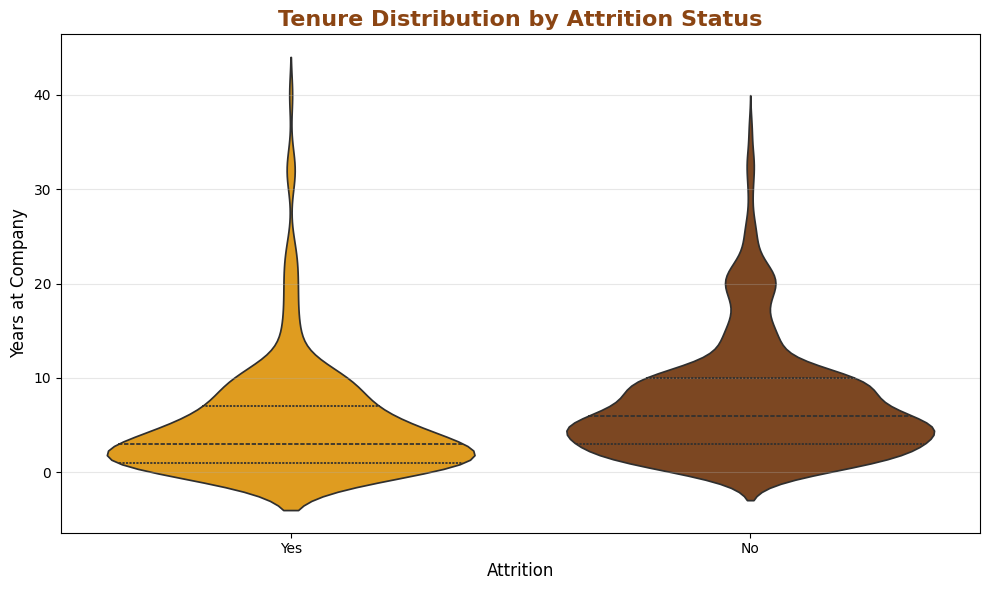

<Figure size 800x600 with 0 Axes>

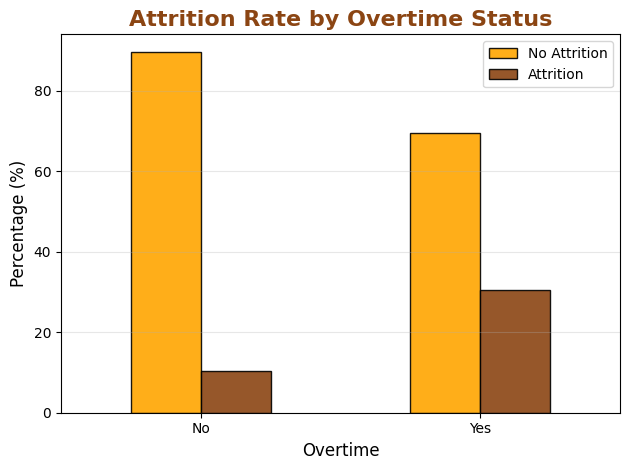

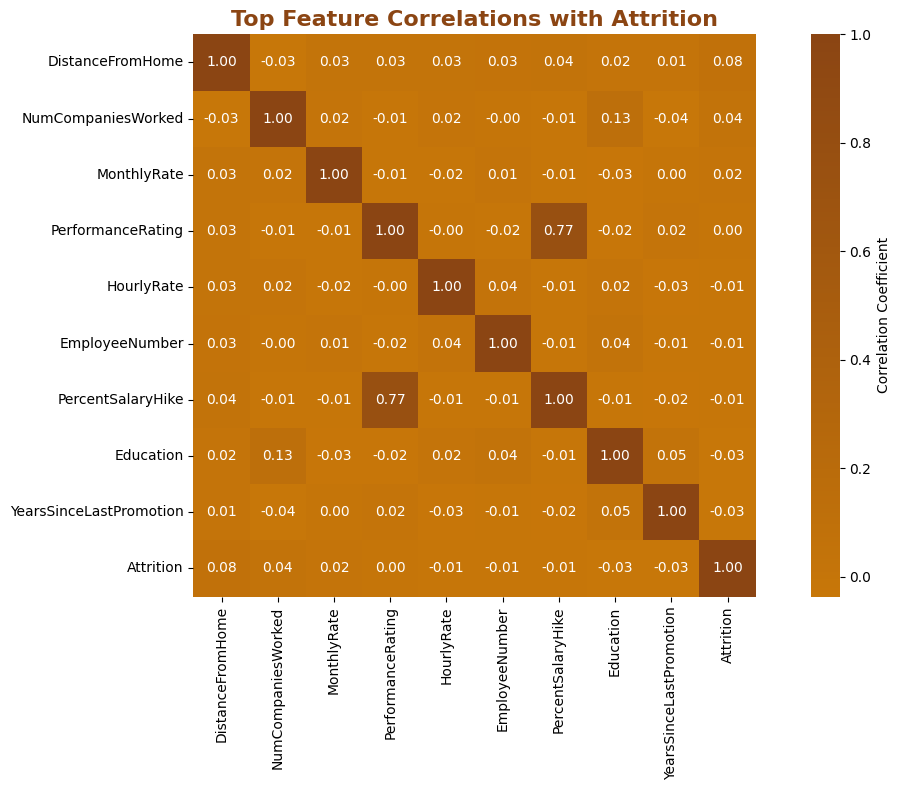

<Figure size 800x600 with 0 Axes>

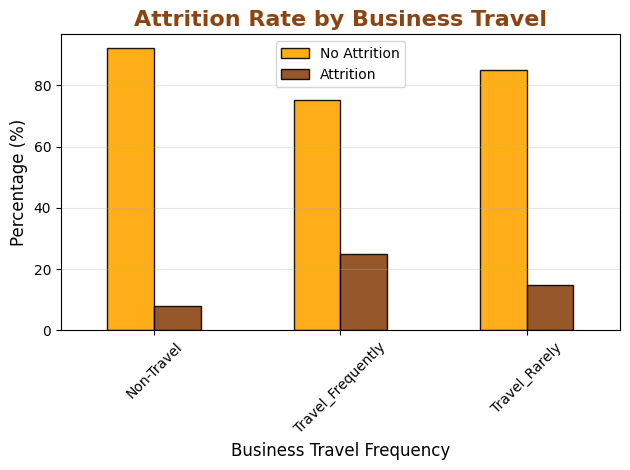

KEY INSIGHTS

1. OVERALL ATTRITION:
   • 237 out of 1,470 employees left (16.1%)

2. AGE ANALYSIS:
   • Average age of employees who left: 33.6 years
   • Average age of employees who stayed: 37.6 years

3. DEPARTMENT ATTRITION RATES:
   • Sales: 20.6%
   • Human Resources: 19.0%
   • Research & Development: 13.8%

4. INCOME ANALYSIS:
   • Average income (left): $4,787
   • Average income (stayed): $6,833
   • Employees who stay earn 42.7% more

5. TENURE ANALYSIS:
   • Average tenure (left): 5.1 years
   • Average tenure (stayed): 7.4 years

6. OVERTIME IMPACT:
   • Attrition with overtime: 30.5%
   • Attrition without overtime: 10.4%

7. TOP CORRELATED FACTORS (excluding self-correlation):
   • TotalWorkingYears: -0.171 (Lower values correlate with attrition)
   • JobLevel: -0.169 (Lower values correlate with attrition)
   • YearsInCurrentRole: -0.161 (Lower values correlate with attrition)

8. BUSINESS TRAVEL IMPACT:
   • Travel_Frequently: 24.9% attrition
   • Travel_Rarely: 15.0% 

In [10]:
# Set orange/brown color palette
orange_palette = ["#FFA500", "#FF8C00", "#FF7F50", "#D2691E", "#8B4513", "#A0522D"]
brown_orange_cmap = LinearSegmentedColormap.from_list("brown_orange", ["#FFA500", "#8B4513"])

# Convert 'Yes'/'No' to numeric for correlation analysis only
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# GRAPH 1: ATTRITION OVERVIEW - Donut Chart
plt.figure(figsize=(8, 8))
attrition_counts = df['Attrition'].value_counts()
colors = ['#FFA500', '#8B4513']
labels = ['No Attrition', 'Attrition']

plt.pie(attrition_counts.values, labels=labels, 
        colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Employee Attrition Distribution', fontsize=16, fontweight='bold', color='#8B4513')
plt.tight_layout()
plt.savefig(f'{graphs_dir}attrition_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# GRAPH 2: ATTRITION BY AGE - Histogram
plt.figure(figsize=(10, 6))
no_attrition = df[df['Attrition'] == 'No']['Age']
attrition = df[df['Attrition'] == 'Yes']['Age']

plt.hist([no_attrition, attrition], bins=20, 
         color=['#FFA500', '#8B4513'], label=['No Attrition', 'Attrition'], 
         alpha=0.8, edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Attrition by Age Groups', fontsize=16, fontweight='bold', color='#8B4513')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{graphs_dir}attrition_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

# GRAPH 3: ATTRITION BY DEPARTMENT - Stacked Bar Chart
plt.figure(figsize=(10, 6))
if 'Department' in df.columns:
    dept_attrition = pd.crosstab(df['Department'], df['Attrition'])
    dept_attrition.plot(kind='bar', stacked=True, 
                        color=['#FFA500', '#8B4513'], 
                        edgecolor='black', alpha=0.9)
    plt.xlabel('Department', fontsize=12)
    plt.ylabel('Employee Count', fontsize=12)
    plt.title('Attrition by Department', fontsize=16, fontweight='bold', color='#8B4513')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}attrition_by_department.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 4: JOB SATISFACTION vs ATTRITION - Heatmap
plt.figure(figsize=(8, 6))
if 'JobSatisfaction' in df.columns:
    satisfaction_attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index')
    sns.heatmap(satisfaction_attrition, annot=True, fmt='.2%', 
                cmap=brown_orange_cmap, 
                cbar_kws={'label': 'Percentage'})
    plt.title('Job Satisfaction vs Attrition Rate', fontsize=16, fontweight='bold', color='#8B4513')
    plt.xlabel('Attrition')
    plt.ylabel('Job Satisfaction Level')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}job_satisfaction_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 5: MONTHLY INCOME DISTRIBUTION - Box Plot
plt.figure(figsize=(10, 6))
if 'MonthlyIncome' in df.columns:
    sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, 
                palette=['#FFA500', '#8B4513'])
    plt.xlabel('Attrition', fontsize=12)
    plt.ylabel('Monthly Income', fontsize=12)
    plt.title('Monthly Income Distribution by Attrition Status', 
              fontsize=16, fontweight='bold', color='#8B4513')
    
    # Use log scale if income distribution is skewed
    if df['MonthlyIncome'].max() / df['MonthlyIncome'].min() > 100:
        plt.yscale('log')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}income_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 6: YEARS AT COMPANY - Violin Plot
plt.figure(figsize=(10, 6))
if 'YearsAtCompany' in df.columns:
    sns.violinplot(x='Attrition', y='YearsAtCompany', data=df, 
                   palette=['#FFA500', '#8B4513'], inner='quartile')
    plt.xlabel('Attrition', fontsize=12)
    plt.ylabel('Years at Company', fontsize=12)
    plt.title('Tenure Distribution by Attrition Status', 
              fontsize=16, fontweight='bold', color='#8B4513')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}tenure_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 7: OVERWORK ANALYSIS - Overtime vs Attrition
plt.figure(figsize=(8, 6))
if 'OverTime' in df.columns:
    overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
    overtime_attrition.plot(kind='bar', color=['#FFA500', '#8B4513'], 
                           edgecolor='black', alpha=0.9)
    plt.xlabel('Overtime', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Attrition Rate by Overtime Status', fontsize=16, fontweight='bold', color='#8B4513')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}overtime_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# GRAPH 8: CORRELATION HEATMAP (Top Features - WITHOUT Attrition_numeric)
plt.figure(figsize=(12, 8))

# Prepare data for correlation - EXCLUDE the Attrition_numeric column
numeric_df = df.select_dtypes(include=[np.number])

# Check if Attrition_numeric exists and remove it from the DataFrame for correlation
if 'Attrition_numeric' in numeric_df.columns:
    # Create a copy without Attrition_numeric
    numeric_df_corr = numeric_df.drop(columns=['Attrition_numeric'])
    
    # Add the numeric attrition column separately
    numeric_df_corr['Attrition'] = df['Attrition_numeric']
    
    # Calculate correlation
    correlation_matrix = numeric_df_corr.corr()
    
    # Get top correlations with attrition (excluding Attrition itself)
    if 'Attrition' in correlation_matrix.columns:
        attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
        
        # Get top features excluding 'Attrition' itself
        top_features = attrition_corr.drop('Attrition').head(9).index  # Get top 9 features
        
        if len(top_features) > 1:
            # Add Attrition back to the top features for display
            display_features = list(top_features) + ['Attrition']
            top_corr = correlation_matrix.loc[display_features, display_features]
            
            sns.heatmap(top_corr, annot=True, cmap=brown_orange_cmap, 
                        center=0, fmt='.2f', square=True,
                        cbar_kws={'label': 'Correlation Coefficient'})
            plt.title('Top Feature Correlations with Attrition', 
                      fontsize=16, fontweight='bold', color='#8B4513')
            plt.tight_layout()
            plt.savefig(f'{graphs_dir}correlation_heatmap.png', dpi=300, bbox_inches='tight')
            plt.show()

# GRAPH 9: BUSINESS TRAVEL IMPACT
plt.figure(figsize=(8, 6))
if 'BusinessTravel' in df.columns:
    travel_attrition = pd.crosstab(df['BusinessTravel'], df['Attrition'], normalize='index') * 100
    travel_attrition.plot(kind='bar', color=['#FFA500', '#8B4513'], 
                         edgecolor='black', alpha=0.9)
    plt.xlabel('Business Travel Frequency', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Attrition Rate by Business Travel', fontsize=16, fontweight='bold', color='#8B4513')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(f'{graphs_dir}business_travel_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

# Calculate key statistics for PPT
print("="*60)
print("KEY INSIGHTS")
print("="*60)

# 1. Overall attrition rate
total_employees = len(df)
attrition_count = (df['Attrition'] == 'Yes').sum()
attrition_rate = (attrition_count / total_employees) * 100
print(f"\n1. OVERALL ATTRITION:")
print(f"   • {attrition_count:,} out of {total_employees:,} employees left ({attrition_rate:.1f}%)")

# 2. Age analysis
avg_age_attrition = df[df['Attrition'] == 'Yes']['Age'].mean()
avg_age_stay = df[df['Attrition'] == 'No']['Age'].mean()
print(f"\n2. AGE ANALYSIS:")
print(f"   • Average age of employees who left: {avg_age_attrition:.1f} years")
print(f"   • Average age of employees who stayed: {avg_age_stay:.1f} years")

# 3. Department analysis
if 'Department' in df.columns:
    dept_analysis = df.groupby('Department')['Attrition_numeric'].mean().sort_values(ascending=False) * 100
    print(f"\n3. DEPARTMENT ATTRITION RATES:")
    for dept, rate in dept_analysis.items():
        print(f"   • {dept}: {rate:.1f}%")

# 4. Income analysis
if 'MonthlyIncome' in df.columns:
    income_attrition = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
    income_stay = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
    income_diff = ((income_stay - income_attrition) / income_attrition) * 100
    print(f"\n4. INCOME ANALYSIS:")
    print(f"   • Average income (left): ${income_attrition:,.0f}")
    print(f"   • Average income (stayed): ${income_stay:,.0f}")
    print(f"   • Employees who stay earn {income_diff:.1f}% more")

# 5. Tenure analysis
if 'YearsAtCompany' in df.columns:
    tenure_attrition = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()
    tenure_stay = df[df['Attrition'] == 'No']['YearsAtCompany'].mean()
    print(f"\n5. TENURE ANALYSIS:")
    print(f"   • Average tenure (left): {tenure_attrition:.1f} years")
    print(f"   • Average tenure (stayed): {tenure_stay:.1f} years")

# 6. Overtime analysis
if 'OverTime' in df.columns:
    overtime_rate = df[df['OverTime'] == 'Yes']['Attrition_numeric'].mean() * 100
    no_overtime_rate = df[df['OverTime'] == 'No']['Attrition_numeric'].mean() * 100
    print(f"\n6. OVERTIME IMPACT:")
    print(f"   • Attrition with overtime: {overtime_rate:.1f}%")
    print(f"   • Attrition without overtime: {no_overtime_rate:.1f}%")

# 7. Top 3 factors from correlation (excluding Attrition_numeric)
if 'Attrition' in correlation_matrix.columns:
    # Get correlations excluding Attrition itself
    attrition_corr_no_self = correlation_matrix['Attrition'].drop('Attrition')
    top_factors = attrition_corr_no_self.sort_values(key=abs, ascending=False).head(3)
    
    print(f"\n7. TOP CORRELATED FACTORS (excluding self-correlation):")
    for factor, corr in top_factors.items():
        direction = "Higher" if corr > 0 else "Lower"
        print(f"   • {factor}: {corr:.3f} ({direction} values correlate with attrition)")

# 8. Business Travel impact
if 'BusinessTravel' in df.columns:
    travel_stats = df.groupby('BusinessTravel')['Attrition_numeric'].mean().sort_values(ascending=False) * 100
    print(f"\n8. BUSINESS TRAVEL IMPACT:")
    for travel_type, rate in travel_stats.items():
        print(f"   • {travel_type}: {rate:.1f}% attrition")

